**1. IMPORTER LES LIBRAIRIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Train_Test_Split
from sklearn.model_selection import train_test_split

# Analyse en Composantes Principales
from sklearn.decomposition import PCA

# Ré-échantillonnage
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Modélisation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
# !pip install threadpoolctl==3.1.0

import warnings
warnings.filterwarnings('ignore')

**2. IMPORTER LE FICHIER**

*a) Lemmatisation / TF-IDF / Réduction de dimension*

In [2]:
df_lem = pd.read_csv("4. Lemmatisation_TF-IDF(Avec_Reduction).csv").astype('float16')
df_lem['y'] = df_lem['y'].astype('uint8')
df_lem = df_lem.rename(columns={'1099' : 'ponctuation', '1100' : 'sentiment'})

### Classification binaire
# Classe 0 : [1, 2, 3]
# Classe 1 : [4, 5]
df_lem['y'] = df_lem['y'].replace((1, 2, 3, 4, 5), (0, 0, 0, 1, 1))

# Classe 0 : [1, 2]
# Classe 1 : [3, 4, 5]
# df_lem['notes'] = df_lem['notes'].replace((1, 2, 3, 4, 5), (0, 0, 0, 1, 1))

df_lem.info()
display(df_lem.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69243 entries, 0 to 69242
Columns: 1102 entries, 0 to y
dtypes: float16(1101), uint8(1)
memory usage: 145.5 MB


,0,1,2,3,4,5,6,7,8,9,...,1092,1093,1094,1095,1096,1097,1098,ponctuation,sentiment,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,-4.183594,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,-3.720703,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,5.550781,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,4.390625,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,0.625488,1


*b) Stemming / TF-IDF / Réduction de dimension*

In [3]:
df_stem = pd.read_csv("4. Stemming_TF-IDF(Avec_Reduction).csv").astype('float16')
df_stem['y'] = df_stem['y'].astype('uint8')
df_stem = df_stem.rename(columns={'1099' : 'ponctuation', '1100' : 'sentiment'})

### Classification binaire
# Classe 0 : [1, 2, 3]
# Classe 1 : [4, 5]
df_stem['y'] = df_stem['y'].replace((1, 2, 3, 4, 5), (0, 0, 0, 1, 1))

# Classe 0 : [1, 2]
# Classe 1 : [3, 4, 5]
# df_stem['notes'] = df_stem['notes'].replace((1, 2, 3, 4, 5), (0, 0, 0, 1, 1))

df_stem.info()
display(df_stem.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69243 entries, 0 to 69242
Columns: 1102 entries, 0 to y
dtypes: float16(1101), uint8(1)
memory usage: 145.5 MB


,0,1,2,3,4,5,6,7,8,9,...,1092,1093,1094,1095,1096,1097,1098,ponctuation,sentiment,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,-4.183594,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,-3.720703,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,5.550781,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,4.390625,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,0.625488,1


**4. SEPARATION TARGET/FEATURES**

*a) Lemmatisation / TF-IDF / Réduction de dimension*

In [4]:
X_lem = df_lem.drop('y', axis = 1).to_numpy()
y_lem = df_lem['y'].to_numpy()

*b) Stemming / TF-IDF / Réduction de dimension*

In [5]:
X_stem = df_stem.drop('y', axis = 1).to_numpy()
y_stem = df_stem['y'].to_numpy()

**5. TRAIN_TEST SPLIT**

*a) Lemmatisation / TF-IDF / Réduction de dimension*

In [6]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.2, random_state = 42)

In [7]:
# Vérification shape
print ("X_train_lem =", X_train_lem.shape)
print ("y_train_lem =", y_train_lem.shape)
print ("X_test_lem =", X_test_lem.shape)
print ("y_test_lem =", y_test_lem.shape)

X_train_lem = (55394, 1101)
y_train_lem = (55394,)
X_test_lem = (13849, 1101)
y_test_lem = (13849,)


*b) Stemming / TF-IDF / Réduction de dimension*

In [8]:
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(X_stem, y_stem, test_size=0.2, random_state = 42)

In [9]:
# Vérification shape
print ("X_train_stem =", X_train_stem.shape)
print ("y_train_stem =", y_train_stem.shape)
print ("X_test_stem =", X_test_stem.shape)
print ("y_test_stem =", y_test_stem.shape)

X_train_stem = (55394, 1101)
y_train_stem = (55394,)
X_test_stem = (13849, 1101)
y_test_stem = (13849,)


**6. ANALYSE EN COMPOSANTES PRINCIPALES (PCA)**

*a) Lemmatisation / TF-IDF / Réduction de dimension*

In [10]:
# pca = PCA(n_components = 0.9)
# X_train_lem = pca.fit_transform(X_train_lem)
# X_test_lem = pca.transform(X_test_lem)
# print("Nombre de composantes retenues :", pca.n_components_)

*b) Stemming / TF-IDF / Réduction de dimension*

In [11]:
# pca = PCA(n_components = 0.9)
# X_train_stem = pca.fit_transform(X_train_stem)
# X_test_stem = pca.transform(X_test_stem)
# print("Nombre de composantes retenues :", pca.n_components_)

**7. RE-ECHANTILLONNAGE**

*1. Undersampling*

In [12]:
rUs = RandomUnderSampler(random_state = 42)

In [13]:
# a) Lemmatisation / TF-IDF / Réduction de dimension
X_ru_lem, y_ru_lem = rUs.fit_resample(X_train_lem, y_train_lem)
print('Classes échantillon undersampled lemmatisation :', dict(pd.Series(y_ru_lem).value_counts()))

Classes échantillon undersampled lemmatisation : {0: 11376, 1: 11376}


In [14]:
# b) Stemming / TF-IDF / Réduction de dimension
X_ru_stem, y_ru_stem = rUs.fit_resample(X_train_stem, y_train_stem)
print('Classes échantillon undersampled stemming :', dict(pd.Series(y_ru_stem).value_counts()))

Classes échantillon undersampled stemming : {0: 11376, 1: 11376}


*2. Oversampling*

In [15]:
rOs = RandomOverSampler(random_state = 42)

In [16]:
# a) Lemmatisation / TF-IDF / Réduction de dimension
X_ro_lem, y_ro_lem = rOs.fit_resample(X_train_lem, y_train_lem)
print('Classes échantillon oversampled lemmatisation :', dict(pd.Series(y_ro_lem).value_counts()))

Classes échantillon oversampled lemmatisation : {1: 44018, 0: 44018}


In [17]:
# b) Stemming / TF-IDF / Réduction de dimension
X_ro_stem, y_ro_stem = rOs.fit_resample(X_train_stem, y_train_stem)
print('Classes échantillon oversampled stemming :', dict(pd.Series(y_ro_stem).value_counts()))

Classes échantillon oversampled stemming : {1: 44018, 0: 44018}


**8. MODELISATION (GRIDSEARCHCV)**

On se contentera d'entraîner nos modèles avec l'Undersampling pour les GridSearchCV.

In [18]:
# f1_score : Lemmatisation
score_lem = []
f1_score_lem = []

# f1_score : Stemming
score_stem = []
f1_score_stem = []

**1) MODELE 1 : SVC**

In [19]:
from sklearn.svm import SVC
clf_svc = SVC(random_state=42)
params_svc = [{'kernel': ['rbf', 'linear'], 'C': [0.01, 0.1, 1, 10]}]

*a. Lemmatisation / Undersampling*

In [20]:
gridsearch = GridSearchCV(estimator = clf_svc, param_grid = params_svc, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_lem, y_ru_lem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_lem = gridsearch.predict(X_test_lem)
score = gridsearch.score(X_test_lem, y_test_lem)
print("Score du modèle :", score)
score_lem.append(score)

print(classification_report_imbalanced(y_test_lem, y_pred_lem))

confusion_matrix = pd.crosstab(y_test_lem, y_pred_lem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_lem.append(f1_score(y_test_lem, y_pred_lem, average='weighted'))
SVC_f1_lem = f1_score(y_test_lem, y_pred_lem, average=None)

Hyperparamètres retenus : {'C': 1, 'kernel': 'linear'}
Score du modèle : 0.7648205646617086
                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.76      0.77      0.57      0.76      0.58      2816
          1       0.93      0.77      0.76      0.84      0.76      0.58     11033

avg / total       0.83      0.76      0.76      0.78      0.76      0.58     13849



Classe prédite,0,1
Classe réelle,,
0,2145,671
1,2586,8447


*b. Stemming / Undersampling*

In [21]:
gridsearch = GridSearchCV(estimator = clf_svc, param_grid = params_svc, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_stem, y_ru_stem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_stem = gridsearch.predict(X_test_stem)
score = gridsearch.score(X_test_stem, y_test_stem)
print("Score du modèle :", score)
score_stem.append(score)

print(classification_report_imbalanced(y_test_stem, y_pred_stem))

confusion_matrix = pd.crosstab(y_test_stem, y_pred_stem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_stem.append(f1_score(y_test_stem, y_pred_stem, average='weighted'))
SVC_f1_stem = f1_score(y_test_stem, y_pred_stem, average=None)

Hyperparamètres retenus : {'C': 1, 'kernel': 'linear'}
Score du modèle : 0.7648205646617086
                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.76      0.77      0.57      0.76      0.58      2816
          1       0.93      0.77      0.76      0.84      0.76      0.58     11033

avg / total       0.83      0.76      0.76      0.78      0.76      0.58     13849



Classe prédite,0,1
Classe réelle,,
0,2145,671
1,2586,8447


**2) MODELE 2 : Régression Logistique**

In [22]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42)
param_lr = [{'solver': ['liblinear', 'lbfgs'], 'C': [0.01, 0.1, 1, 10]}]

*a. Lemmatisation / Undersampling*

In [23]:
gridsearch = GridSearchCV(estimator = clf_lr, param_grid = param_lr, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_lem, y_ru_lem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_lem = gridsearch.predict(X_test_lem)
score = gridsearch.score(X_test_lem, y_test_lem)
print("Score du modèle :", score)
score_lem.append(score)

print(classification_report_imbalanced(y_test_lem, y_pred_lem))

confusion_matrix = pd.crosstab(y_test_lem, y_pred_lem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_lem.append(f1_score(y_test_lem, y_pred_lem, average='weighted'))
LR_f1_lem = f1_score(y_test_lem, y_pred_lem, average=None)

Hyperparamètres retenus : {'C': 1, 'solver': 'lbfgs'}
Score du modèle : 0.764315113004549
                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.76      0.76      0.57      0.76      0.58      2816
          1       0.93      0.76      0.76      0.84      0.76      0.58     11033

avg / total       0.83      0.76      0.76      0.78      0.76      0.58     13849



Classe prédite,0,1
Classe réelle,,
0,2150,666
1,2598,8435


*b. Stemming / Undersampling*

In [24]:
gridsearch = GridSearchCV(estimator = clf_lr, param_grid = param_lr, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_stem, y_ru_stem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_stem = gridsearch.predict(X_test_stem)
score = gridsearch.score(X_test_stem, y_test_stem)
print("Score du modèle :", score)
score_stem.append(score)

print(classification_report_imbalanced(y_test_stem, y_pred_stem))

confusion_matrix = pd.crosstab(y_test_stem, y_pred_stem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_stem.append(f1_score(y_test_stem, y_pred_stem, average='weighted'))
LR_f1_stem = f1_score(y_test_stem, y_pred_stem, average=None)

Hyperparamètres retenus : {'C': 1, 'solver': 'lbfgs'}
Score du modèle : 0.764315113004549
                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.76      0.76      0.57      0.76      0.58      2816
          1       0.93      0.76      0.76      0.84      0.76      0.58     11033

avg / total       0.83      0.76      0.76      0.78      0.76      0.58     13849



Classe prédite,0,1
Classe réelle,,
0,2150,666
1,2598,8435


**3) MODELE 3 : K Neighbors**

In [25]:
from sklearn import neighbors
clf_knn = neighbors.KNeighborsClassifier()
params_knn = [{'n_neighbors': [3, 5, 10, 20, 30]}]

*a. Lemmatisation / Undersampling*

In [26]:
gridsearch = GridSearchCV(estimator = clf_knn, param_grid = params_knn, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_lem, y_ru_lem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_lem = gridsearch.predict(X_test_lem)
score = gridsearch.score(X_test_lem, y_test_lem)
print("Score du modèle :", score)
score_lem.append(score)

print(classification_report_imbalanced(y_test_lem, y_pred_lem))

confusion_matrix = pd.crosstab(y_test_lem, y_pred_lem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_lem.append(f1_score(y_test_lem, y_pred_lem, average='weighted'))
KNN_f1_lem = f1_score(y_test_lem, y_pred_lem, average=None)

Hyperparamètres retenus : {'n_neighbors': 30}
Score du modèle : 0.71940212289696
                   pre       rec       spe        f1       geo       iba       sup

          0       0.39      0.69      0.73      0.50      0.71      0.50      2816
          1       0.90      0.73      0.69      0.81      0.71      0.50     11033

avg / total       0.80      0.72      0.70      0.74      0.71      0.50     13849



Classe prédite,0,1
Classe réelle,,
0,1936,880
1,3006,8027


*b. Stemming / Undersampling*

In [27]:
gridsearch = GridSearchCV(estimator = clf_knn, param_grid = params_knn, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_stem, y_ru_stem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_stem = gridsearch.predict(X_test_stem)
score = gridsearch.score(X_test_stem, y_test_stem)
print("Score du modèle :", score)
score_stem.append(score)

print(classification_report_imbalanced(y_test_stem, y_pred_stem))

confusion_matrix = pd.crosstab(y_test_stem, y_pred_stem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_stem.append(f1_score(y_test_stem, y_pred_stem, average='weighted'))
KNN_f1_stem = f1_score(y_test_stem, y_pred_stem, average=None)

Hyperparamètres retenus : {'n_neighbors': 30}
Score du modèle : 0.71940212289696
                   pre       rec       spe        f1       geo       iba       sup

          0       0.39      0.69      0.73      0.50      0.71      0.50      2816
          1       0.90      0.73      0.69      0.81      0.71      0.50     11033

avg / total       0.80      0.72      0.70      0.74      0.71      0.50     13849



Classe prédite,0,1
Classe réelle,,
0,1936,880
1,3006,8027


**4) MODELE 4 : Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
params_rf = [{'n_estimators': [10, 50, 100, 250, 500], 'min_samples_leaf': [1, 3, 5, 8, 10], 'max_features': ['sqrt', 'log2', 'None']}]

*a. Lemmatisation / Undersampling*

In [29]:
gridsearch = GridSearchCV(estimator = clf_rf, param_grid = params_rf, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_lem, y_ru_lem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_lem = gridsearch.predict(X_test_lem)
score = gridsearch.score(X_test_lem, y_test_lem)
print("Score du modèle :", score)
score_lem.append(score)

print(classification_report_imbalanced(y_test_lem, y_pred_lem))

confusion_matrix = pd.crosstab(y_test_lem, y_pred_lem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_lem.append(f1_score(y_test_lem, y_pred_lem, average='weighted'))
RF_f1_lem = f1_score(y_test_lem, y_pred_lem, average=None)

Hyperparamètres retenus : {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}
Score du modèle : 0.7646761499025201
                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.79      0.76      0.58      0.77      0.60      2816
          1       0.93      0.76      0.79      0.84      0.77      0.60     11033

avg / total       0.84      0.76      0.78      0.78      0.77      0.60     13849



Classe prédite,0,1
Classe réelle,,
0,2213,603
1,2656,8377


*b. Stemming / Undersampling*

In [30]:
gridsearch = GridSearchCV(estimator = clf_rf, param_grid = params_rf, scoring = 'f1_micro', cv=3, n_jobs = -1)
grille = gridsearch.fit(X_ru_stem, y_ru_stem)
print("Hyperparamètres retenus :", grille.best_params_)

y_pred_stem = gridsearch.predict(X_test_stem)
score = gridsearch.score(X_test_stem, y_test_stem)
print("Score du modèle :", score)
score_stem.append(score)

print(classification_report_imbalanced(y_test_stem, y_pred_stem))

confusion_matrix = pd.crosstab(y_test_stem, y_pred_stem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

f1_score_stem.append(f1_score(y_test_stem, y_pred_stem, average='weighted'))
RF_f1_stem = f1_score(y_test_stem, y_pred_stem, average=None)

Hyperparamètres retenus : {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}
Score du modèle : 0.7646761499025201
                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.79      0.76      0.58      0.77      0.60      2816
          1       0.93      0.76      0.79      0.84      0.77      0.60     11033

avg / total       0.84      0.76      0.78      0.78      0.77      0.60     13849



Classe prédite,0,1
Classe réelle,,
0,2213,603
1,2656,8377


**9. PERFORMANCES DES MODELES**

In [31]:
modeles = ['SVC', 'LR', 'KNN', 'RF']
x = ['0', '1']

*a. Lemmatisation / Undersampling*

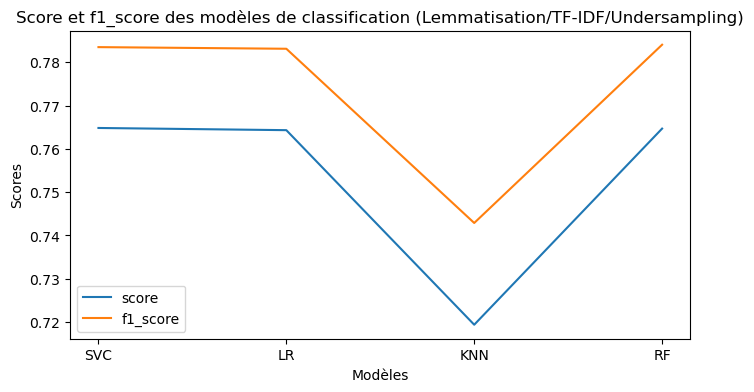

In [32]:
# Score et f1_score des modèles
plt.figure(figsize = (8,4))
sns.lineplot(x=modeles, y=score_lem, label= 'score')
sns.lineplot(x=modeles, y=f1_score_lem, label='f1_score')
plt.title("Score et f1_score des modèles de classification (Lemmatisation/TF-IDF/Undersampling)")
plt.xlabel('Modèles') 
plt.ylabel('Scores')
plt.legend()
plt.show()

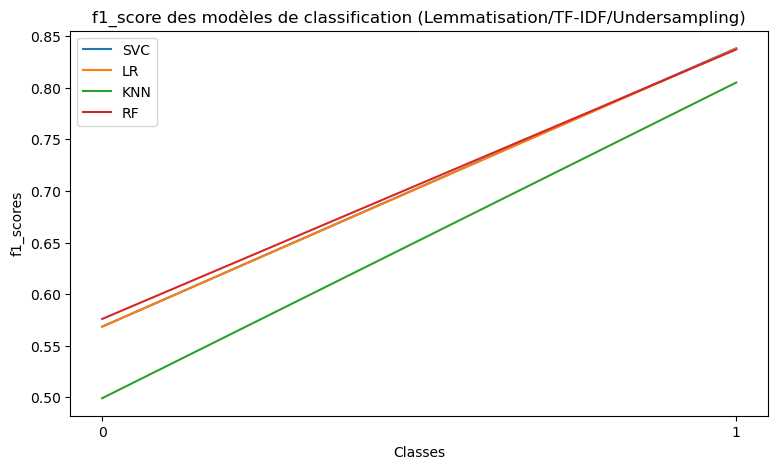

In [33]:
# f1_score en fonction des classes pour chaque modèle
plt.figure(figsize = (9,5))
plt.title("f1_score des modèles de classification (Lemmatisation/TF-IDF/Undersampling)")
sns.lineplot(x=x, y=SVC_f1_lem, label='SVC')
sns.lineplot(x=x, y=LR_f1_lem, label='LR')
sns.lineplot(x=x, y=KNN_f1_lem, label='KNN')
sns.lineplot(x=x, y=RF_f1_lem, label='RF')
plt.xlabel('Classes') 
plt.ylabel('f1_scores')
plt.legend()
plt.show()

*b. Stemming / Undersampling*

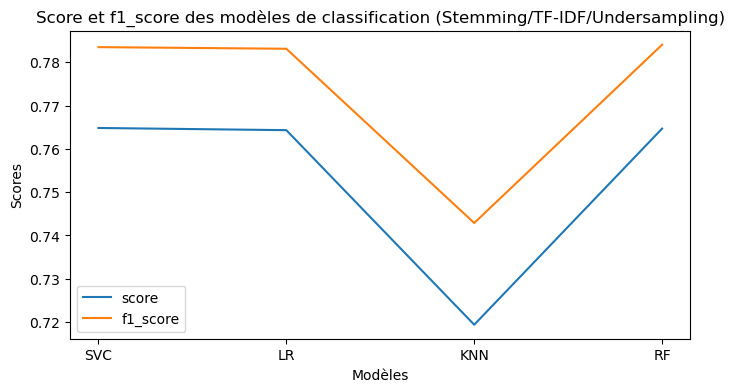

In [34]:
# Score et f1_score des modèles
plt.figure(figsize = (8,4))
sns.lineplot(x=modeles, y=score_stem, label= 'score')
sns.lineplot(x=modeles, y=f1_score_stem, label='f1_score')
plt.title("Score et f1_score des modèles de classification (Stemming/TF-IDF/Undersampling)")
plt.xlabel('Modèles') 
plt.ylabel('Scores')
plt.legend()
plt.show()

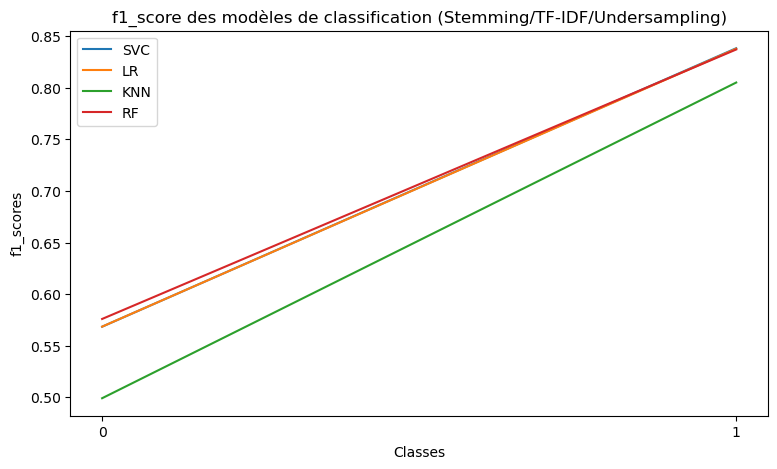

In [35]:
# f1_score en fonction des classes pour chaque modèle
plt.figure(figsize = (9,5))
plt.title("f1_score des modèles de classification (Stemming/TF-IDF/Undersampling)")
sns.lineplot(x=x, y=SVC_f1_stem, label='SVC')
sns.lineplot(x=x, y=LR_f1_stem, label='LR')
sns.lineplot(x=x, y=KNN_f1_stem, label='KNN')
sns.lineplot(x=x, y=RF_f1_stem, label='RF')
plt.xlabel('Classes') 
plt.ylabel('f1_scores')
plt.legend()
plt.show()

In [36]:
print("f1_score_stem =", f1_score_stem)
print("SVC_f1_stem =", SVC_f1_stem)
print("LR_f1_stem =", LR_f1_stem)
print("RF_f1_stem =", RF_f1_stem)

f1_score_stem = [0.7834833116104407, 0.7831066608668746, 0.7428909489343529, 0.7840386510902665]
SVC_f1_stem = [0.56843779 0.8383703 ]
LR_f1_stem = [0.56848228 0.83788616]
RF_f1_stem = [0.57592713 0.83715585]
